<h2 style="color:red">Deep Learning [(Project No:03----Pet Classification Model Using CNN)]</h2> 

In [3]:
import numpy as np
import pandas as pd 

In [4]:
import os
for dirname, _, filenames in os.walk('/data/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<h2 style="color:Green">Importing the necessary libararies</h2> 

In [5]:
! pip install torch

In [6]:
! pip install opencv-python

In [7]:
! pip install tensorflow

In [8]:
! pip install keras

In [9]:
import cv2
import matplotlib.pyplot as plt

# os for file system related tasks
import os

# random to fix seeds
import random
import tensorflow as tf
import torch

# import keras to build CNN model
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

<h2 style="color:Green">Build our CNN model to train it to detect whether it's cat or a dog</h2> 

In [10]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    tf.random.set_seed(seed)

# We fix all the random seed so that, we can reproduce the results.
seed_everything(2020)

In [11]:
# images shape
fc_size=32
IMAGE_SHAPE = 128

input_layer = Input(shape=(IMAGE_SHAPE, IMAGE_SHAPE, 3))

convolution_layer_1 = Conv2D(32, kernel_size=(5,5), activation = 'relu')(input_layer)
max_pool_1 = MaxPooling2D(pool_size=(2,2), strides=2)(convolution_layer_1)

convolution_layer_2 = Conv2D(64, kernel_size=(5,5), activation = 'relu')(max_pool_1)
max_pool_2 = MaxPooling2D(pool_size=(2,2),strides=2)(convolution_layer_2)


dense_layer_1 = Dense(fc_size, activation='relu')(max_pool_2)
flatten_layer_1 = Flatten()(dense_layer_1)
dropout_1 = Dropout(0.4)(flatten_layer_1)





output_layer = Dense(1, activation='sigmoid')(dropout_1)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 29, 29, 32)        2080      
_________________________________________________________________
flatten (Flatten)            (None, 26912)             0     

In [12]:
! pip install pydot

In [13]:
plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


<h2 style="color:Green">Getting the data ready</h2> 

In [14]:
train_data_generator = ImageDataGenerator(
    # We divide each pixel value(0, 255) with 255 to make them in range [0, 1]
    rescale = 1./255, 
    
    # We randomly shear & zoom our image while training to make our training robust
    shear_range = 0.2, 
    zoom_range = 0.2, 
    
    # We also flip our images by 180 degree horizontally to make our training robust
    horizontal_flip = True
)

test_data_generator = ImageDataGenerator(
    rescale = 1./255
)

In [15]:
training_set_data = train_data_generator.flow_from_directory(
    "/DATA SCIENTIST & AI/Simplilearn/AI/Deep Learning with Keras & tensor flow/Project/Data set of Pet Classification Model Using CNN/data/train", 
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE), 
    batch_size = 64,
    class_mode = 'binary'
)

test_set_data = test_data_generator.flow_from_directory(
    "/DATA SCIENTIST & AI/Simplilearn/AI/Deep Learning with Keras & tensor flow/Project/Data set of Pet Classification Model Using CNN/data/test",
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE),
    batch_size = 64, 
    class_mode = 'binary'
)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


<h2 style="color:Green"> Fitting the data into the model</h2> 

In [16]:
model.fit_generator(
    training_set_data, 
    epochs = 50, 
    validation_data = test_set_data, 
)

C:\Users\welcome\.spyder-py3\anaconda64bit\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1/1 [==============================] - 12s 12s/step - loss: 0.6853 - accuracy: 0.6250 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 0.7087 - accuracy: 0.5000 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 5s 5s/step - loss: 0.6985 - accuracy: 0.4250 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 5s 5s/step - loss: 0.6780 - accuracy: 0.6500 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 0.6834 - accuracy: 0.5750 - val_loss: 0.6871 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 5s 5s/step - loss: 0.6686 - accuracy: 0.6250 - val_loss: 0.6895 - val_accuracy: 0.5500
Epoch 7/50
1/1 [==============================] - 5s 5s/step - loss: 0.6789 - accuracy: 0.5500 - val_loss: 0.6855 - val_accuracy: 0.5500
Epoch 8/50
1/1 [=======================

<h2 style="color:Green"> Testing our model on test data</h2> 

In [17]:
import cv2

Model : It's a DOG


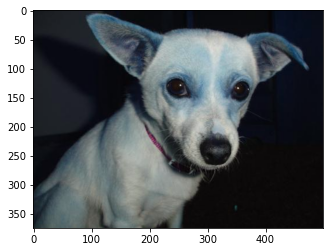

In [44]:
TEST_PATH = "/DATA SCIENTIST & AI/Simplilearn/AI/Deep Learning with Keras & tensor flow/Project/Data set of Pet Classification Model Using CNN/data/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "dogs/")

test_dog_img = test_dogs_images[3]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "dogs/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a DOG")
else:
    print("Model : It's a CAT")


Model : It's a CAT


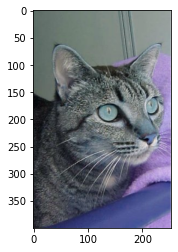

In [43]:
TEST_PATH = "/DATA SCIENTIST & AI/Simplilearn/AI/Deep Learning with Keras & tensor flow/Project/Data set of Pet Classification Model Using CNN/data/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "cats/")

test_dog_img = test_dogs_images[3]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "cats/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] >= 0.5:
    print("Model : It's a DOG")
else:
    print("Model : It's a CAT")

<h2 style="color:Brown"> THE END</h2> 